In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [2]:
X_train = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_train.npy")
X_test = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_test.npy")
y_train = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_train.npy")
y_test = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_test.npy")
X_val = np.load(r"C:\Users\asus\Desktop\spectrograms\data\X_val.npy")
y_val = np.load(r"C:\Users\asus\Desktop\spectrograms\data\y_val.npy")

In [3]:
y_train.shape

(5238, 10)

In [4]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 1
num_labels = y_train.shape[1]
num_filters = [24,32,64,128] 
pool_size = (2, 2) 
kernel_size = (3, 3) 
input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [11]:

    
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size,padding="same", input_shape=input_shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))

model.add(keras.layers.Conv2D(32, kernel_size,padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))  
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    
model.add(keras.layers.Conv2D(64, kernel_size,padding="same"))
model.add(keras.layers.Activation("relu"))  
model.add(keras.layers.MaxPooling2D(pool_size=pool_size))
    
model.add(keras.layers.Conv2D(128, kernel_size,padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))  
model.add(keras.layers.Dense(128, activation="relu"))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(num_labels, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(1e-4), 
        loss=keras.losses.CategoricalCrossentropy(), 
        metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 32)      

In [13]:
EPOCHS = 25
BATCH_SIZE  = 32

In [14]:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(X_val, y_val), 
                    steps_per_epoch= 100)

Epoch 1/25
100/100 [==============================] - 5s 39ms/step - loss: 1.3650 - accuracy: 0.5319 - val_loss: 2.4431 - val_accuracy: 0.0985
Epoch 2/25
100/100 [==============================] - 4s 37ms/step - loss: 0.8420 - accuracy: 0.7238 - val_loss: 2.9057 - val_accuracy: 0.0469
Epoch 3/25
100/100 [==============================] - 4s 35ms/step - loss: 0.6456 - accuracy: 0.7941 - val_loss: 2.8807 - val_accuracy: 0.1145
Epoch 4/25
100/100 [==============================] - 4s 37ms/step - loss: 0.5044 - accuracy: 0.8539 - val_loss: 2.3599 - val_accuracy: 0.2799
Epoch 5/25
100/100 [==============================] - 4s 36ms/step - loss: 0.4292 - accuracy: 0.8715 - val_loss: 1.7120 - val_accuracy: 0.4442
Epoch 6/25
100/100 [==============================] - 4s 37ms/step - loss: 0.3256 - accuracy: 0.9081 - val_loss: 1.1081 - val_accuracy: 0.6251
Epoch 7/25
100/100 [==============================] - 4s 41ms/step - loss: 0.2776 - accuracy: 0.9229 - val_loss: 0.5935 - val_accuracy: 0.8346

Text(0.5, 1.0, 'Training and Validation Accuracy')

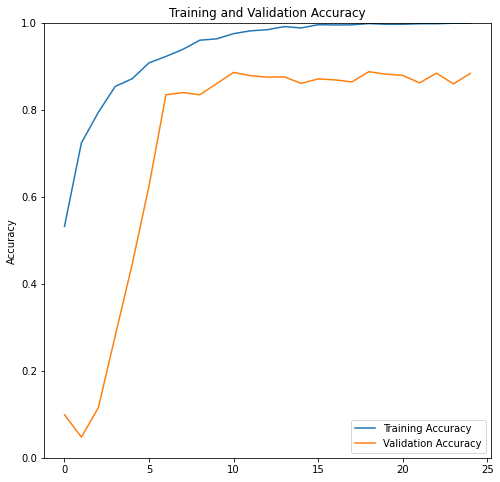

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

55/55 [==============================] - 1s 14ms/step - loss: 0.4003 - accuracy: 0.8884
Test accuracy : 0.8883800506591797
